# Data Loading

In [8]:
import os

def get_file_names(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    # Filter out directories, leaving only files
    file_names = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    return file_names

folder_path = './marked_data'
file_names = get_file_names(folder_path)
print("File names in the folder:")
for file_name in file_names:
    print(file_name)

File names in the folder:
result_with_parameters_0.csv
result_with_parameters_1.csv
result_with_parameters_2.csv
result_with_parameters_3.csv
result_with_parameters_4.csv


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = list()
for i, file_name in enumerate(file_names):
    temp = pd.read_csv(f'./marked_data/{file_name}')
    temp = temp.drop(["index", ], axis=1)  # "past_OBV", "upper_ST", "lower_ST"
    data_for_analysis = temp
    y, X = temp["result"], temp.drop(["result"], axis=1)
    data.append([y, X])
    
data[2][1]

,close,open,high,low,volume,EMA_prev_diff,EMA_current_diff,prev_RSI,current_RSI,MACD_prev_diff,...,BB_lower,StochRSI_K,StochRSI_D,ST_upper,ST_lower,ART,aroon_up,aroon_low,OBV,OBV_MA
0,270.22,270.22,270.61,270.20,70,-0.063712,0.436842,49.574189,13.189032,0.023510,...,269.990203,11.392405,23.949066,274.0533,275.641429,1.383741,92.0,28.0,341678.0,341665.333333
1,270.60,270.60,270.60,270.23,36,0.436842,0.852394,13.189032,17.223395,0.001368,...,269.989424,35.443038,31.965943,274.0533,275.641429,1.382825,88.0,24.0,341714.0,341673.733333
2,270.60,270.60,270.61,270.07,236,0.852394,1.223820,17.223395,17.223395,0.011350,...,270.043984,35.443038,31.965943,274.0533,275.641429,1.393303,84.0,20.0,341714.0,341686.266667
3,270.60,270.25,270.60,270.07,52,1.223820,1.555370,17.223395,17.223395,0.016666,...,270.042585,35.443038,31.965943,274.0533,275.641429,1.402416,80.0,16.0,341714.0,341694.000000
4,270.11,270.60,270.60,270.09,136,1.555370,1.892675,17.223395,16.221694,0.018742,...,270.001700,0.000000,20.151597,274.0533,275.641429,1.409589,76.0,12.0,341578.0,341697.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,276.07,276.06,276.10,276.06,930,-0.077712,-0.074969,51.094821,51.333664,-0.010906,...,276.010537,1.754386,20.736393,274.0533,275.641429,1.031477,48.0,12.0,693837.0,693419.533333
21565,276.06,276.07,276.19,276.06,2371,-0.074969,-0.071588,51.333664,51.081684,-0.009423,...,276.007931,0.877193,20.443995,274.0533,275.641429,1.038045,44.0,8.0,691466.0,693251.066667
21566,276.10,276.13,276.14,276.06,204,-0.071588,-0.071903,51.081684,52.032965,-0.008656,...,276.010892,4.424779,21.626523,274.0533,275.641429,1.040842,40.0,4.0,691670.0,693067.600000
21567,276.10,276.09,276.10,276.09,5,-0.071903,-0.072117,52.032965,52.032965,-0.005167,...,276.013974,4.424779,21.626523,274.0533,275.641429,1.038786,36.0,8.0,691670.0,692939.333333


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get data
divided_data = list()
for data_train in data:
    divided_data.append(train_test_split(data_train[1], data_train[0], test_size=0.20, random_state = 2020, stratify=data_train[0]))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2020, stratify=y)

# Scale Data

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for i, data_train in enumerate(divided_data):
    divided_data[i][0] = ss.fit_transform(data_train[0])
    divided_data[i][1] = ss.fit_transform(data_train[1])
    
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i, data_train in enumerate(divided_data):
    X_train_list.append(data_train[0])
    X_test_list.append(data_train[1])
    y_train_list.append(data_train[2])
    y_test_list.append(data_train[3])

X_train_scaled = np.concatenate(X_train_list, axis=0)
X_test_scaled = np.concatenate(X_test_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

X_train_scaled
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)
# y_train = np.array(y_train)

array([[ 0.37318128,  0.36978778,  0.37040421, ...,  1.275287  ,
         0.53122835,  0.5306263 ],
       [ 0.0211219 ,  0.02290609,  0.02098994, ...,  1.51364122,
         0.06440106,  0.08406161],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -1.34660941,
         0.17445534,  0.17297364],
       ...,
       [-0.2070754 , -0.20122066, -0.20623739, ...,  1.39560403,
        -0.03726625, -0.0198231 ],
       [ 0.03192608,  0.05324079,  0.04213736, ..., -1.30884228,
         0.13167666,  0.12878387],
       [-0.63632681, -0.60788335, -0.61979917, ...,  0.92526554,
        -0.78891728, -0.76956188]])

# Over Sampling

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
#smote = SMOTE()

# Fit SMOTE to the training data
X_train_scaled, y_train = adasyn.fit_resample(X_train_scaled, y_train)
X_train_scaled

array([[ 0.37318128,  0.36978778,  0.37040421, ...,  1.275287  ,
         0.53122835,  0.5306263 ],
       [ 0.0211219 ,  0.02290609,  0.02098994, ...,  1.51364122,
         0.06440106,  0.08406161],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -1.34660941,
         0.17445534,  0.17297364],
       ...,
       [-1.0143404 , -1.00821146, -1.01497319, ..., -1.09077338,
        -1.27002537, -1.25427588],
       [ 0.72224751,  0.72076271,  0.71364301, ...,  0.83663695,
         0.50799858,  0.51192371],
       [-0.61700912, -0.62488306, -0.6190269 , ...,  1.00167748,
        -0.78544443, -0.76701168]])

# Undersempling

In [254]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
undersampler = RandomUnderSampler()

# Fit undersampler to the training data
X_train_scaled, y_train = undersampler.fit_resample(X_train_scaled, y_train)
X_train_scaled

array([[ 0.0211219 ,  0.02290609,  0.02098994, ..., -0.23948667,
        -1.27617226,  1.51364122],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -0.22169714,
         0.85091909, -1.34660941],
       [ 0.33242153,  0.32973546,  0.32873315, ..., -0.30897924,
         0.73274735, -0.63154675],
       ...,
       [-1.40907218, -1.41010494, -1.42187675, ..., -0.61407139,
         1.29126909, -1.15441453],
       [-0.77389404, -0.76107471, -0.7666231 , ...,  1.10409227,
         0.68923111, -1.14920323],
       [ 0.0070283 ,  0.01423748, -0.01301873, ..., -0.58329678,
        -0.00511631,  0.79929882]])

# Learning

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))
display(rfc.score(X_test_scaled, y_test))

1.0

0.8366472927500764

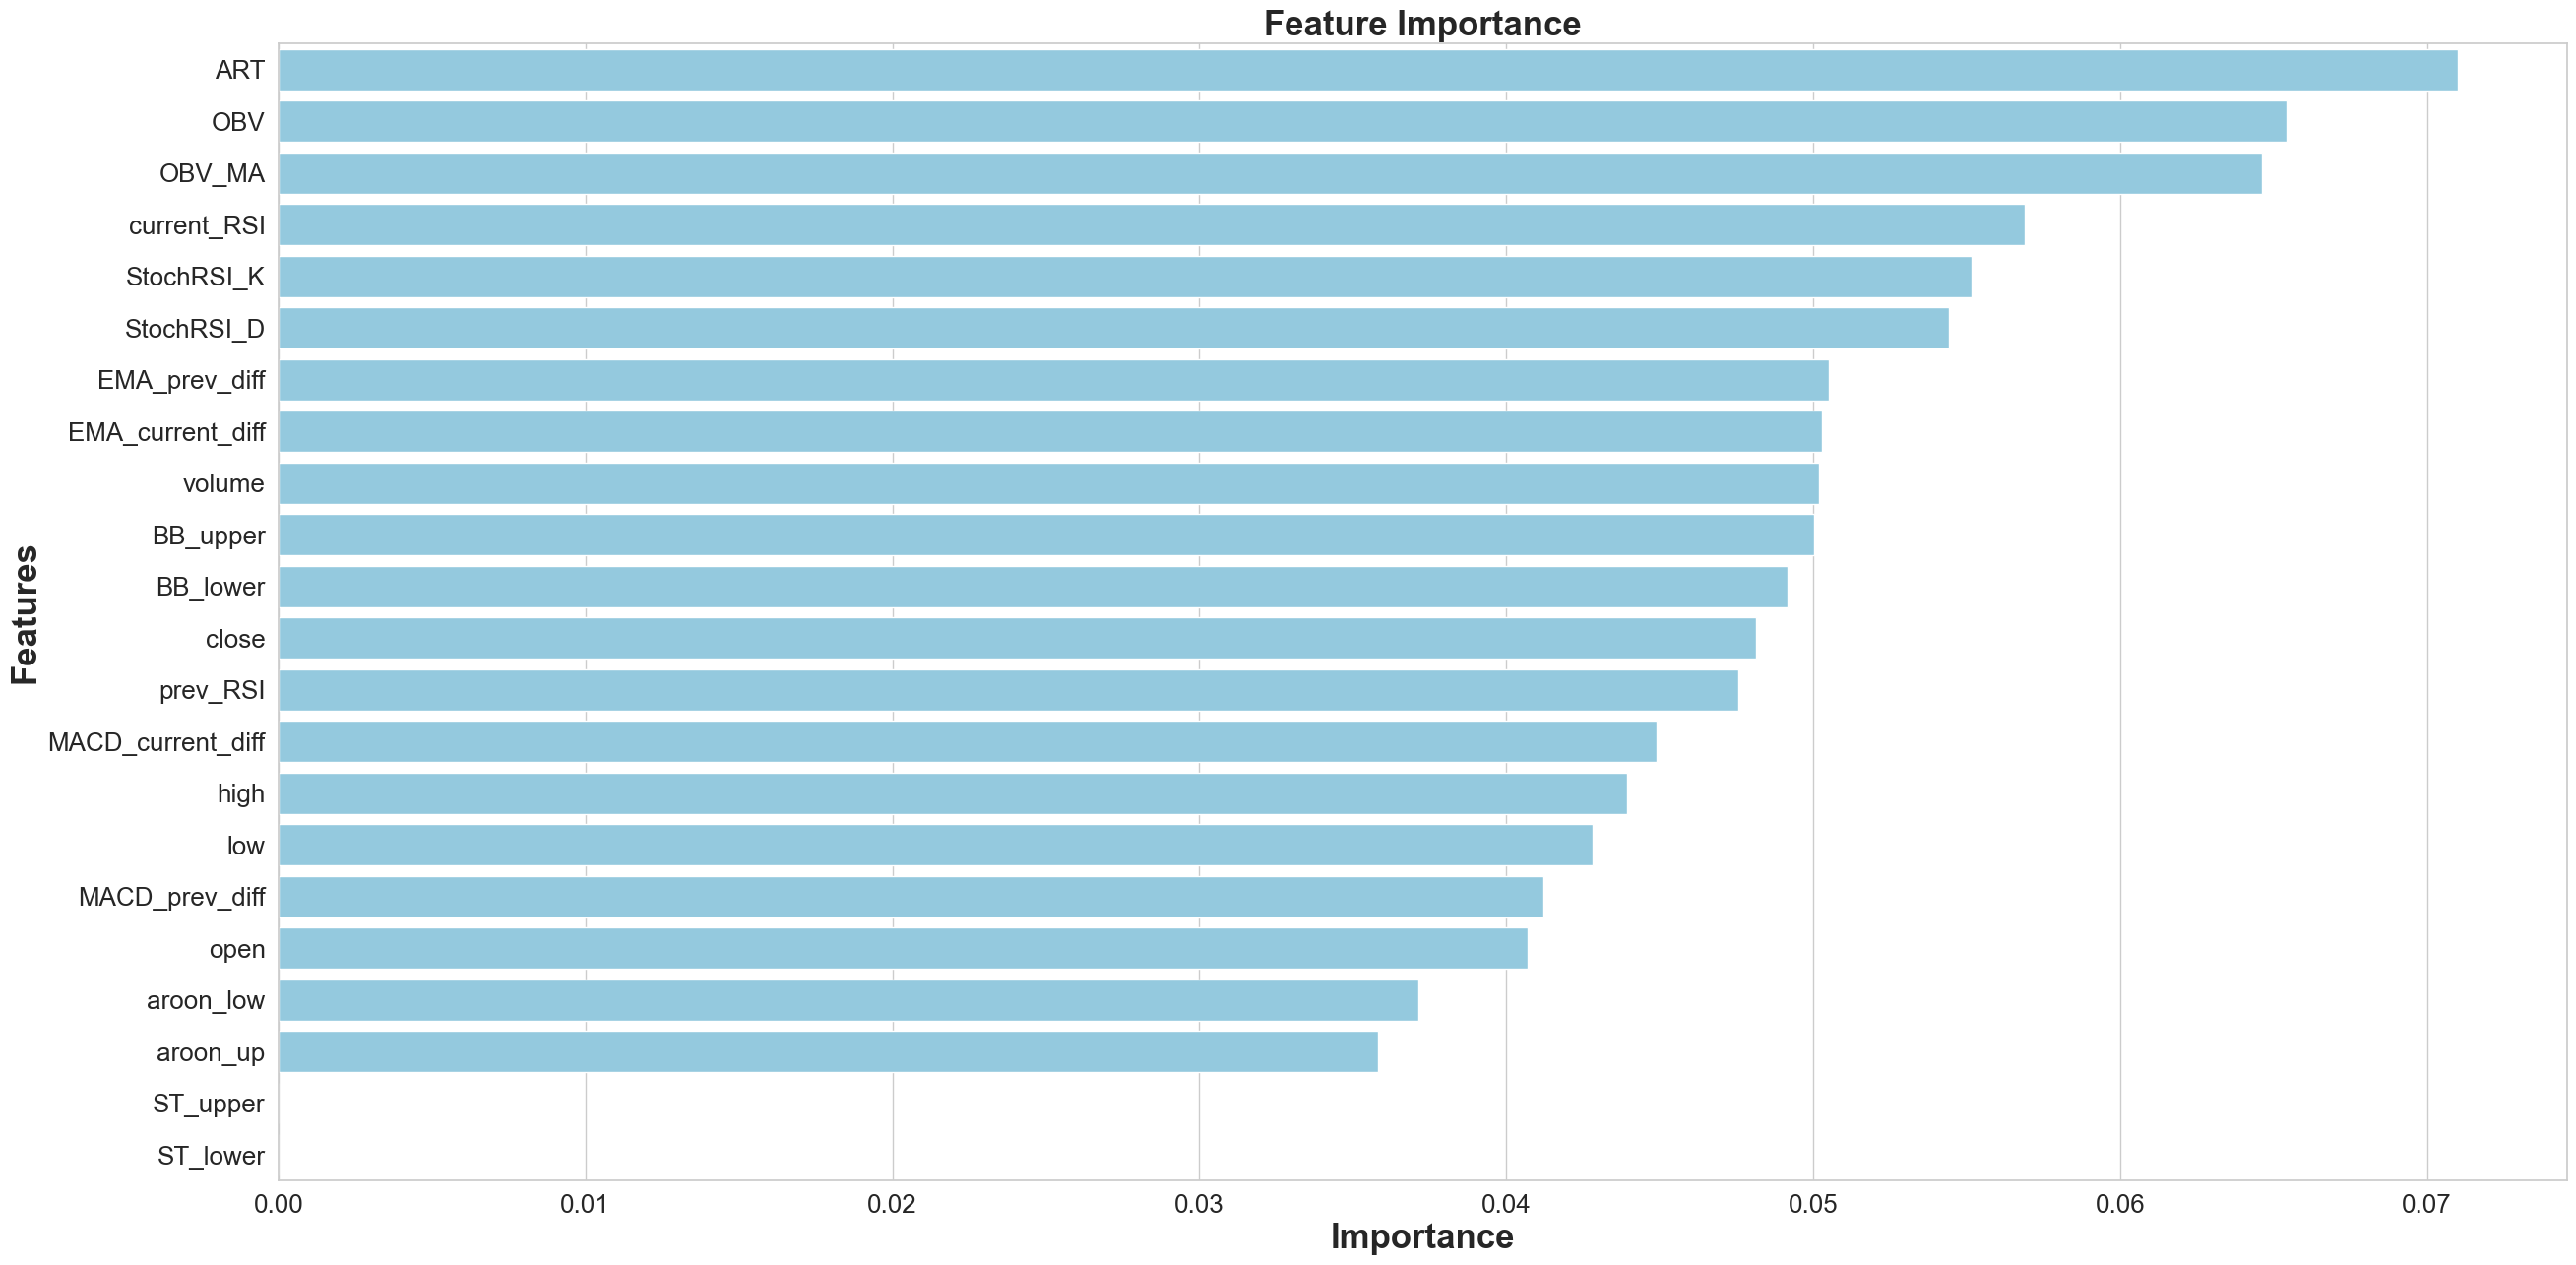

None

,Features,Gini-Importance
0,ART,0.071011
1,OBV,0.065425
2,OBV_MA,0.064623
3,current_RSI,0.056896
4,StochRSI_K,0.055164
5,StochRSI_D,0.054430
6,EMA_prev_diff,0.050499
7,EMA_current_diff,0.050274
8,volume,0.050205
9,BB_upper,0.050021


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

feats = {}
for feature, importance in zip(data_for_analysis.drop("result", axis=1).columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

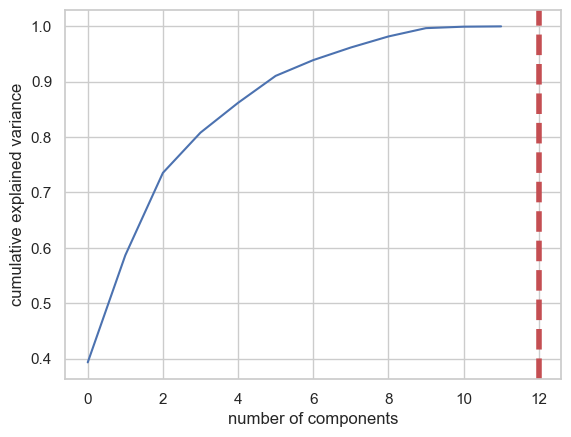

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.393080,0.393080
1,0.586471,0.193391
2,0.735200,0.148729
3,0.807760,0.072560
4,0.861549,0.053789
5,0.910209,0.048660
6,0.938667,0.028458
7,0.961417,0.022750
8,0.981354,0.019937
9,0.996381,0.015027


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=12)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=12, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(12))

In [212]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100,
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [232]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': 600,
    'min_samples_split': 23,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 15,
    'bootstrap': False
}

# Instantiate Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(**param_grid)

# Train the model (assuming X_train and y_train are your training data)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=2,
                       min_samples_split=23, n_estimators=600)

In [16]:
"""
just in case
{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}
"""

from sklearn.metrics import confusion_matrix, precision_score

# y_pred_probs = rfc.predict_proba(X_test_scaled)[:, 1]
# 
# new_threshold = 0.5  # Example: setting a higher threshold
# 
# # Adjust the predicted labels based on the new threshold
# y_pred = (y_pred_probs >= new_threshold).astype(int)
y_pred = rfc.predict(X_test_scaled)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display('Baseline Random Forest precision score', precision_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,9951,1873
actual 1,1331,6459


'Baseline Random Forest recall score'

0.8291399229781772

'Baseline Random Forest precision score'

0.7752040326452232

In [17]:
from joblib import dump

model_filename = 'random_forest_model.joblib'
dump(rfc, model_filename)

['random_forest_model.joblib']

# Gradient Boosting model

In [258]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# Create a Gradient Boosting Classifier instance
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train_scaled, y_train)

# Evaluate the model on the training and test data
train_score = gbm.score(X_train_scaled, y_train)
test_score = gbm.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.6548570582762412
Test Accuracy: 0.5756092586927705


In [260]:
# Calculate recall score on the test data
y_pred_test = gbm.predict(X_test_scaled)
recall = recall_score(y_test, y_pred_test)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_test), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
print("Test Recall Score:", recall)
display('Test precision score', precision_score(y_test, y_pred_test))

,predicted 0,predicted 1
actual 0,5270,6554
actual 1,1770,6020


Test Recall Score: 0.772785622593068


'Test precision score'

0.4787657070144743

In [186]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Instantiate the GBM classifier
gbm = GradientBoostingClassifier()

scorer = make_scorer(precision_score)

# Instantiate GridSearchCV with precision as the scoring metric
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
test_score = grid_search.score(X_train_scaled, y_test)
print("Test Accuracy:", test_score)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


ValueError: Found input variables with inconsistent numbers of samples: [12243, 88996]

In [192]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
test_score = grid_search.score(X_test_scaled, y_test)
print("Test Accuracy:", test_score)

y_pred_test = grid_search.predict(X_test_scaled)

display(conf_matrix_baseline)
print("Test Recall Score:", recall_score(y_test, y_pred_test))
display('Test precision score', precision_score(y_test, y_pred_test))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Test Accuracy: 0.15275634731378876


,predicted 0,predicted 1
actual 0,7439,3671
actual 1,161,972


Test Recall Score: 0.9611650485436893


'Test precision score'

0.15275634731378876